# Supervised Learning with k-Nearest Neighbors

[k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a simple supervised-learning algorithm that predicts an outcome by identifying the data points closest in proximity to the input data. Let's use *k*-nearest neighbors to build a simple supervised-learning model using the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which contains 150 samples describing measurements for three species of iris. Start by importing the dataset and wrapping a Pandas DataFrame around it. The dataset is one of several sample datasets included with Scikit.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df['class name'] = iris.target_names[iris['target']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Use Seaborn's handy [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to visualize the relationships between variables.

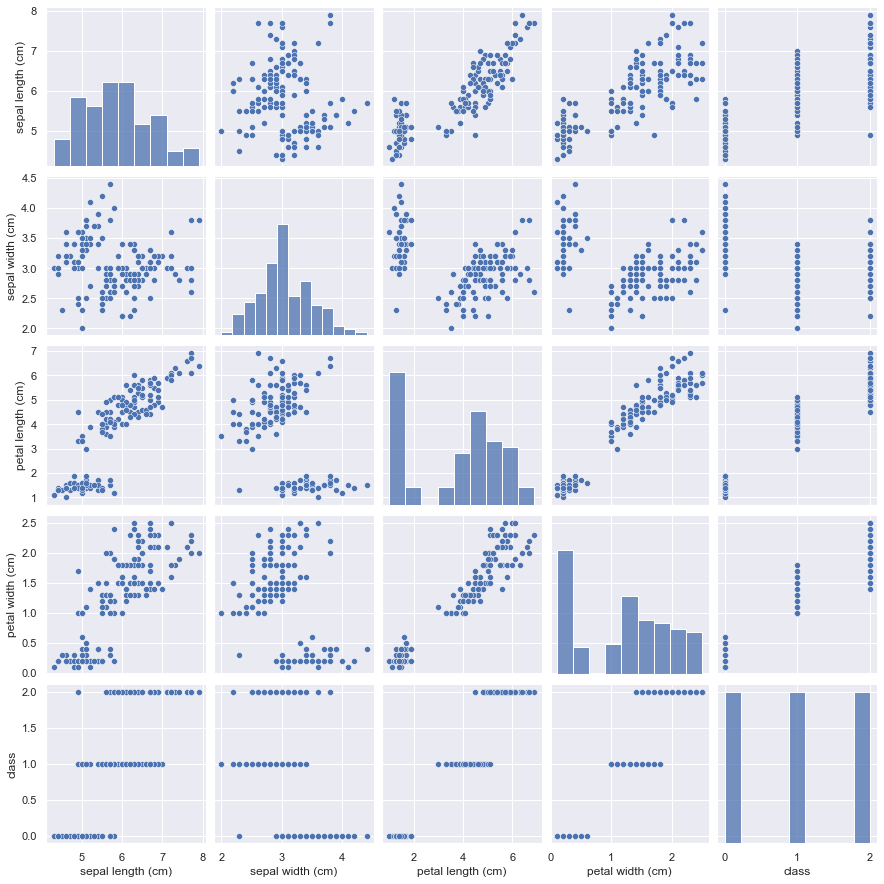

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(df)

Now split the dataset into two datasets: one for training and one for testing.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

Build and train a k-nearest neighbors model that predicts a class (0, 1, or 2) given a flower's sepal length, sepal width, petal length, and petal width.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

Score the model to get a measure of its accuracy.

In [5]:
model.score(x_test, y_test)

0.9666666666666667

Input a sepal length, sepal width, petal length, and petal width that the model hasn't seen before and make a prediction.

In [6]:
predicted_class = model.predict([[5.6, 4.4, 1.2, 0.4]])
print(predicted_class)

[0]


The predicted class is 0, but which species does that correspond to?

In [7]:
print(iris.target_names[predicted_class[0]])

setosa


Train the model again, this time using 10 nearest neighbors rather than the default of 5. Does it score the same as the previous model?

In [8]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

The number of neighbors you choose can influence the outcome. In practice, data scientists often experiment with different values for `n_neighbors` to determine which value produces the most accurate model.